## sklearn库中可以直接调用的线性regression模型

d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

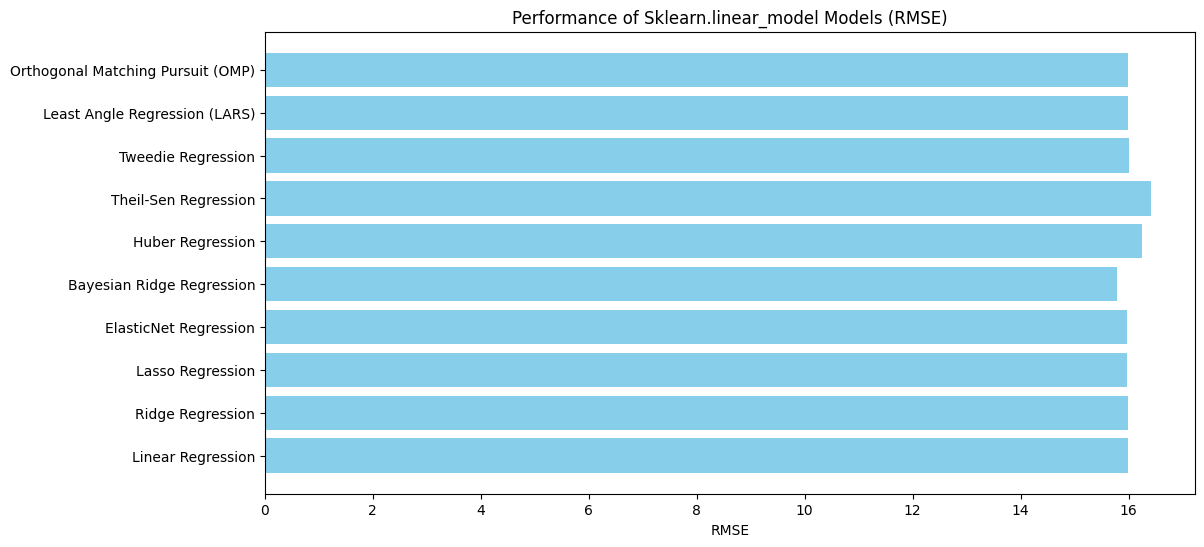

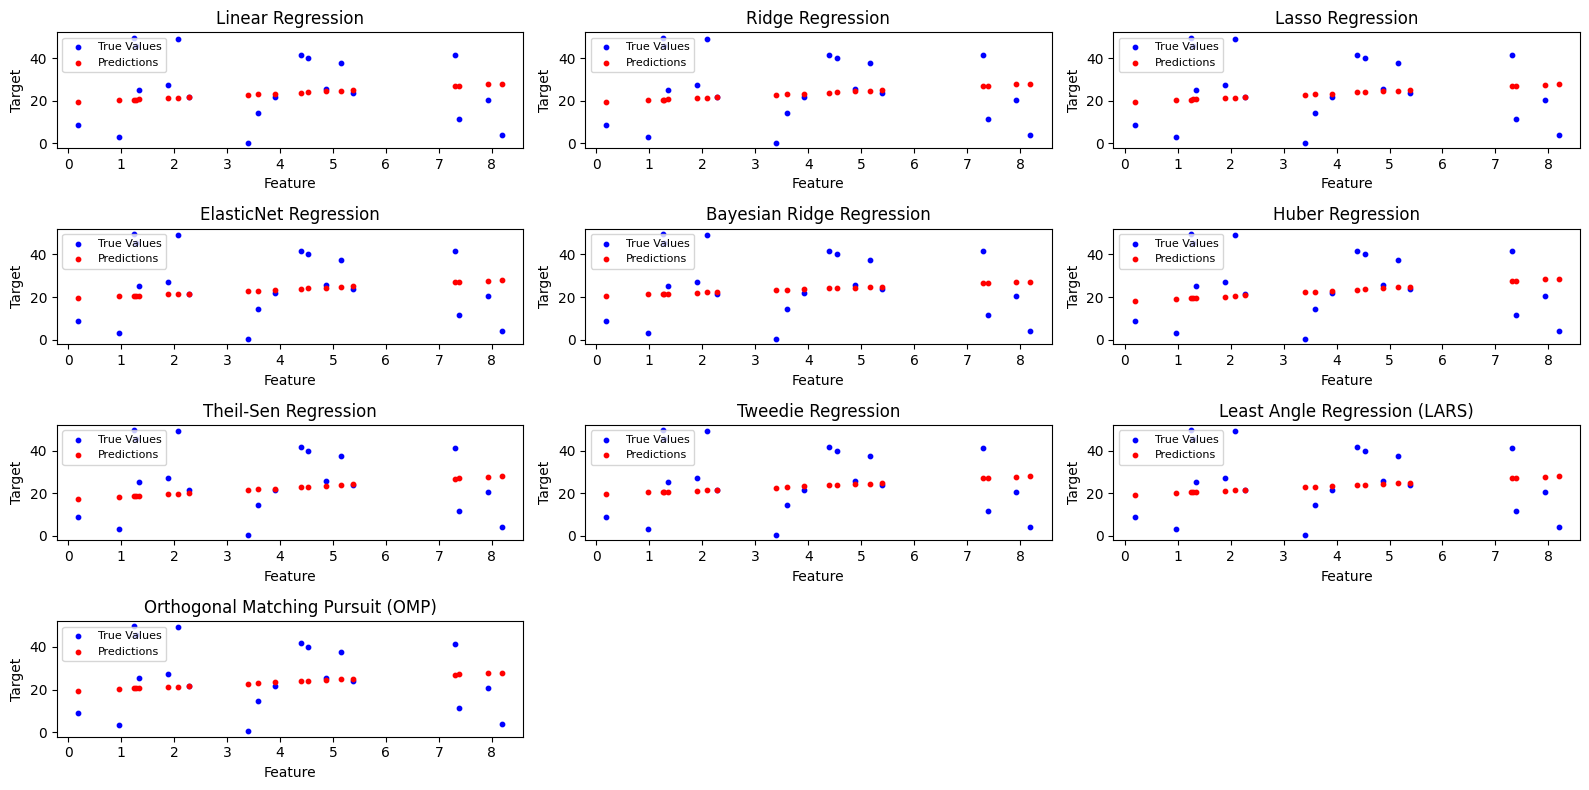

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    ElasticNet,
    BayesianRidge,
    HuberRegressor,
    TheilSenRegressor,
    TweedieRegressor,
    Lars,
    OrthogonalMatchingPursuit
)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic dataset
X, y = np.random.rand(100, 1) * 10, np.random.rand(100) * 50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models from sklearn.linear_model
models_sklearn = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Bayesian Ridge Regression": BayesianRidge(),
    "Huber Regression": HuberRegressor(),
    "Theil-Sen Regression": TheilSenRegressor(),
    "Tweedie Regression": TweedieRegressor(power=1.5, alpha=0.1),
    "Least Angle Regression (LARS)": Lars(),
    "Orthogonal Matching Pursuit (OMP)": OrthogonalMatchingPursuit(),
}

# Train, predict, and evaluate models
results_sklearn = {}
predictions_sklearn = {}
for name, model in models_sklearn.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    results_sklearn[name] = rmse
    predictions_sklearn[name] = y_pred

# Visualize RMSE
plt.figure(figsize=(12, 6))
plt.barh(list(results_sklearn.keys()), list(results_sklearn.values()), color='skyblue')
plt.xlabel("RMSE")
plt.title("Performance of Sklearn.linear_model Models (RMSE)")
plt.show()

# Visualize Predictions vs. True Values
plt.figure(figsize=(16, 8))
for i, (name, y_pred) in enumerate(predictions_sklearn.items()):
    plt.subplot(4, 3, i + 1)
    plt.scatter(X_test, y_test, color='blue', label='True Values', s=10)
    plt.scatter(X_test, y_pred, color='red', label='Predictions', s=10)
    plt.title(name)
    plt.legend(loc="upper left", fontsize=8)
    plt.xlabel("Feature")
    plt.ylabel("Target")

plt.tight_layout()
plt.show()


d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

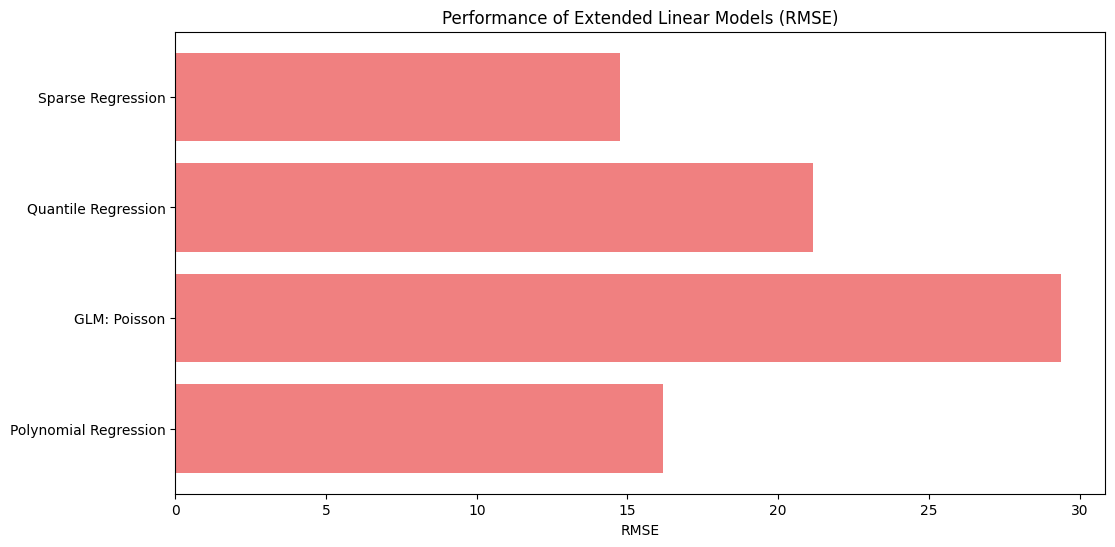

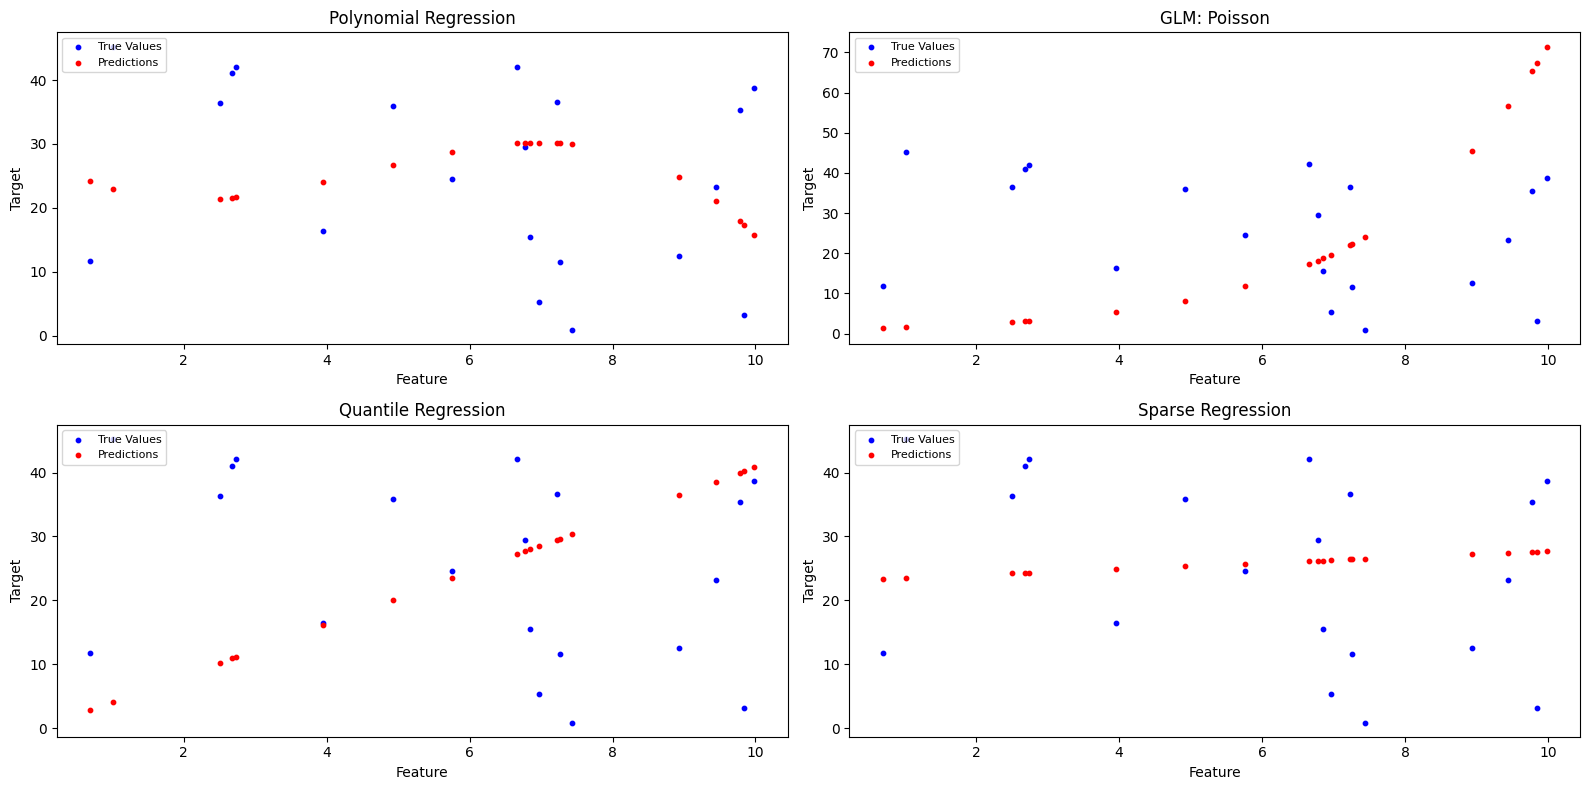

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.api import GLM, families
from statsmodels.regression.quantile_regression import QuantReg

# Generate synthetic dataset
X, y = np.random.rand(100, 1) * 10, np.random.rand(100) * 50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten for libraries requiring 1D arrays
X_train_flat, X_test_flat = X_train.flatten(), X_test.flatten()

# Define results storage
results_ext = {}
predictions_ext = {}

# 1. Polynomial Regression
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = np.linalg.lstsq(X_train_poly, y_train, rcond=None)[0]
y_pred_poly = X_test_poly @ poly_model
rmse_poly = mean_squared_error(y_test, y_pred_poly, squared=False)
results_ext["Polynomial Regression"] = rmse_poly
predictions_ext["Polynomial Regression"] = y_pred_poly

# 2. Generalized Linear Model (GLMs) - Poisson Regression
glm_poisson = GLM(y_train, X_train, family=families.Poisson())
glm_poisson_results = glm_poisson.fit()
y_pred_poisson = glm_poisson_results.predict(X_test)
rmse_poisson = mean_squared_error(y_test, y_pred_poisson, squared=False)
results_ext["GLM: Poisson"] = rmse_poisson
predictions_ext["GLM: Poisson"] = y_pred_poisson

# 3. Quantile Regression
quantile_model = QuantReg(y_train, X_train)
quantile_results = quantile_model.fit(q=0.5)
y_pred_quantile = quantile_results.predict(X_test)
rmse_quantile = mean_squared_error(y_test, y_pred_quantile, squared=False)
results_ext["Quantile Regression"] = rmse_quantile
predictions_ext["Quantile Regression"] = y_pred_quantile

# 4. Sparse Pseudo-Normal Regression (Simulated Example)
# Using L1 regularization to simulate sparsity
from sklearn.linear_model import Lasso
sparse_model = Lasso(alpha=0.1)
sparse_model.fit(X_train, y_train)
y_pred_sparse = sparse_model.predict(X_test)
rmse_sparse = mean_squared_error(y_test, y_pred_sparse, squared=False)
results_ext["Sparse Regression"] = rmse_sparse
predictions_ext["Sparse Regression"] = y_pred_sparse

# Visualize RMSE
plt.figure(figsize=(12, 6))
plt.barh(list(results_ext.keys()), list(results_ext.values()), color='lightcoral')
plt.xlabel("RMSE")
plt.title("Performance of Extended Linear Models (RMSE)")
plt.show()

# Visualize Predictions vs. True Values
plt.figure(figsize=(16, 8))
for i, (name, y_pred) in enumerate(predictions_ext.items()):
    plt.subplot(2, 2, i + 1)
    plt.scatter(X_test, y_test, color='blue', label='True Values', s=10)
    plt.scatter(X_test, y_pred, color='red', label='Predictions', s=10)
    plt.title(name)
    plt.legend(loc="upper left", fontsize=8)
    plt.xlabel("Feature")
    plt.ylabel("Target")

plt.tight_layout()
plt.show()


### **总结：回归模型的特点、适用场景与优缺点**

以下是两段代码中涉及到的所有模型的详细总结：

---

### **1. Sklearn.linear_model 提供的模型**

#### **1.1 Linear Regression**
- **特点**：
  - 最基本的线性回归模型，假设目标变量与特征是线性关系。
- **适用场景**：
  - 关系明确且无复杂非线性关系的数据。
- **优点**：
  - 简单易用，解释性强。
- **缺点**：
  - 对异常值敏感，无法处理复杂的非线性关系。

#### **1.2 Ridge Regression**
- **特点**：
  - 在线性回归基础上引入 L2 正则化，防止过拟合。
- **适用场景**：
  - 高维数据，存在共线性的情况。
- **优点**：
  - 能有效解决多重共线性问题。
- **缺点**：
  - 无法自动选择重要特征。

#### **1.3 Lasso Regression**
- **特点**：
  - 引入 L1 正则化，稀疏化特征选择。
- **适用场景**：
  - 高维数据，需要特征选择的情况。
- **优点**：
  - 自动选择重要特征。
- **缺点**：
  - 当特征相关性较强时表现不佳。

#### **1.4 ElasticNet Regression**
- **特点**：
  - 同时引入 L1 和 L2 正则化，结合 Ridge 和 Lasso 的优点。
- **适用场景**：
  - 特征高度相关或数量大于样本数的情况。
- **优点**：
  - 兼顾 Ridge 和 Lasso 的优点。
- **缺点**：
  - 参数调节复杂。

#### **1.5 Bayesian Ridge Regression**
- **特点**：
  - 在 Ridge 回归基础上引入贝叶斯框架，提供分布信息。
- **适用场景**：
  - 需要不确定性估计的任务。
- **优点**：
  - 提供参数的分布估计。
- **缺点**：
  - 计算复杂度较高。

#### **1.6 Huber Regression**
- **特点**：
  - 对异常值鲁棒的线性回归。
- **适用场景**：
  - 数据中存在异常值的情况。
- **优点**：
  - 对异常值不敏感。
- **缺点**：
  - 参数选择需要经验。

#### **1.7 Theil-Sen Regression**
- **特点**：
  - 基于中位数的鲁棒线性回归。
- **适用场景**：
  - 数据中存在显著异常值的情况。
- **优点**：
  - 非常鲁棒。
- **缺点**：
  - 对大数据集计算较慢。

#### **1.8 Tweedie Regression**
- **特点**：
  - 广义线性模型的一种，适用于非正态分布。
- **适用场景**：
  - 混合分布的目标变量（如保险费用预测）。
- **优点**：
  - 灵活处理非正态分布。
- **缺点**：
  - 参数选择复杂。

#### **1.9 Least Angle Regression (LARS)**
- **特点**：
  - 高效的特征选择方法，逐步逼近目标。
- **适用场景**：
  - 高维稀疏数据。
- **优点**：
  - 速度快，适合高维数据。
- **缺点**：
  - 对异常值敏感。

#### **1.10 Orthogonal Matching Pursuit (OMP)**
- **特点**：
  - 稀疏线性模型，逐步选择解释力最强的特征。
- **适用场景**：
  - 高维稀疏数据。
- **优点**：
  - 结果可解释性强。
- **缺点**：
  - 对噪声敏感。

---

### **2. 其他库或扩展实现的模型**

#### **2.1 Polynomial Regression**
- **特点**：
  - 通过多项式扩展处理非线性关系。
- **适用场景**：
  - 存在非线性关系的任务。
- **优点**：
  - 能捕捉复杂的非线性关系。
- **缺点**：
  - 易过拟合。

#### **2.2 Generalized Linear Model (GLMs): Poisson Regression**
- **特点**：
  - 适合于泊松分布目标变量的回归。
- **适用场景**：
  - 计数数据建模（如事件发生次数）。
- **优点**：
  - 能准确建模非正态分布数据。
- **缺点**：
  - 假设严格，需满足分布条件。

#### **2.3 Quantile Regression**
- **特点**：
  - 估计目标变量的条件分位数。
- **适用场景**：
  - 非对称分布的目标变量。
- **优点**：
  - 更灵活，能捕捉分布的不同特性。
- **缺点**：
  - 参数估计复杂。

#### **2.4 Sparse Pseudo-Normal Regression**
- **特点**：
  - 稀疏化模型，模拟稀疏数据的回归任务。
- **适用场景**：
  - 高维稀疏数据。
- **优点**：
  - 自动选择关键特征。
- **缺点**：
  - 对正则化参数敏感。

---

### **选型建议**

| **任务特点**                 | **推荐模型**                                                                                     |
|------------------------------|-------------------------------------------------------------------------------------------------|
| 数据线性关系强               | Linear Regression, Ridge Regression                                                           |
| 数据稀疏或高维               | Lasso Regression, ElasticNet Regression, LARS, OMP                                           |
| 数据中存在异常值             | Huber Regression, Theil-Sen Regression                                                      |
| 数据目标为泊松分布           | GLM: Poisson Regression                                                                      |
| 数据目标具有非对称分布       | Quantile Regression                                                                          |
| 数据中存在复杂非线性关系     | Polynomial Regression                                                                        |
| 需要稀疏特征选择             | Sparse Pseudo-Normal Regression                                                             |
| 需要预测结果的不确定性估计   | Bayesian Ridge Regression                                                                    |
| 混合分布或非正态分布数据     | Tweedie Regression                                                                          |

